# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:

'''
Por defecto, keras tira de GPU
'''

'\nPor defecto, keras tira de GPU\n'

Empezamos importando librerías

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test


Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'))

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [7]:
# Preprocess the data (these are NumPy arrays). Aplano a una dimension cada imagen.
# Escalamos ya que vamos a usar gradient descent, y le afecta mucho la escala de las features.
# Ejecutar esta celda solo una vez. Si no, reescalará


In [8]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [9]:
# Reserve 10,000 samples for validation. Entraran dentro del modelo para validar. No es validacion cruzada


print(X_val)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [10]:
# Una manera de declarar la red neuronal

# Siempre hay que declarar la capa sequential para empezar a declarar la red
# Se trata de la API sequential


# Flatten, aplana en un unico vector. Y especificamos el tamaño de la entrada
# Es como si hiciese un .reshape(-1, 28*28)
# "kernel_initializer" o "bias_initializer" No lo usamos pero seria para inicializar los pesos de otra manera


# Capas de la red. Dense es la capa de neuronas. Necesitamos numero y activacion



# Capa de salida, con tamaño del número de clases
# Suele ir aqui un softmax. Para multiclase guay. Si es binaria -> sigmoide


In [11]:
# Otra manera de declarar la red neuronal


Podemos ver las capas, y acceder a sus elementos

In [12]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [13]:


# 784 features (pixeles de las imagenes) x 300 neuronas
# Los pesos están inicializados aleatoriamente


(784, 300)

Establecemos la configuración de ejecución... el compile.

In [14]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):

    # Stocastic gradient descent. El algoritmo para minimizar la loss function
    # El stocastic va haciendo muestreo en cada evaluacion, no usa todo.
    # Podemos modificar el learning rate(0.01 por defecto) mediante el parametro lr
    
    
    
    # Loss function to minimize
    # sparse_categorical_crossentropy cuando tenemos un label en nuna columna
    # Si lo tuviesemos en varias tipo dummy, cogeriamos categorical_crossentropy
    
    
    # List of metrics to monitor
    


In [15]:
# Equivalente


In [16]:
# Summary
# La primera hidden layer tiene 784 entradas x 300 salidas
# Son los 235500 params = 783x300 + 300 (bias)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [17]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.

    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.1
    

'''
En el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.
Si vemos que ya no baja mas, no serán necesarias tantas epochs.
Imprimera tantas lineas como epochs hayamos puesto

Tampoco usamos el class_weight, que le da más peso a las clases con pocas muestras
Util para datasets desbalanceados.

El loss que muestra es el categoricalcrossentropy
'''


Fit model on training data
Epoch 1/15
782/782 [==============================] - 3s 3ms/step - loss: 1.4043 - accuracy: 0.6287 - val_loss: 0.4015 - val_accuracy: 0.8961
Epoch 2/15
782/782 [==============================] - 2s 2ms/step - loss: 0.4091 - accuracy: 0.8892 - val_loss: 0.3132 - val_accuracy: 0.9135
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3261 - accuracy: 0.9105 - val_loss: 0.2685 - val_accuracy: 0.9264
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2795 - accuracy: 0.9198 - val_loss: 0.2442 - val_accuracy: 0.9311
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 0.2617 - accuracy: 0.9271 - val_loss: 0.2314 - val_accuracy: 0.9326
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2329 - accuracy: 0.9351 - val_loss: 0.2105 - val_accuracy: 0.9414
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 0.2165 - accuracy: 0.9398 - val_loss: 0.1960 - 

'\nEn el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.\nSi vemos que ya no baja mas, no serán necesarias tantas epochs.\nImprimera tantas lineas como epochs hayamos puesto\n\nTampoco usamos el class_weight, que le da más peso a las clases con pocas muestras\nUtil para datasets desbalanceados.\n\nEl loss que muestra es el categoricalcrossentropy\n'

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1281 - accuracy: 0.9639 - val_loss: 0.1335 - val_accuracy: 0.9631
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1221 - accuracy: 0.9660 - val_loss: 0.1278 - val_accuracy: 0.9662
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.1261 - val_accuracy: 0.9656
Epoch 4/15
782/782 [==============================] - 3s 3ms/step - loss: 0.1113 - accuracy: 0.9692 - val_loss: 0.1223 - val_accuracy: 0.9678
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1065 - accuracy: 0.9704 - val_loss: 0.1192 - val_accuracy: 0.9680
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 0.1020 - accuracy: 0.9714 - val_loss: 0.1156 - val_accuracy: 0.9678
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 0.0977 - accuracy: 0.9732 - val_loss: 0.1170 - val_accuracy: 0.9673
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [19]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.9049946665763855,
  0.3779575824737549,
  0.3125596046447754,
  0.2782071530818939,
  0.25314468145370483,
  0.23330585658550262,
  0.21643804013729095,
  0.20227639377117157,
  0.18928885459899902,
  0.17794933915138245,
  0.16746218502521515,
  0.15794992446899414,
  0.14947766065597534,
  0.14172479510307312,
  0.1346474438905716],
 'accuracy': [0.7793599963188171,
  0.8961799740791321,
  0.9121400117874146,
  0.9218400120735168,
  0.9294999837875366,
  0.9351599812507629,
  0.9390000104904175,
  0.9430999755859375,
  0.9464600086212158,
  0.9498199820518494,
  0.9525200128555298,
  0.9550399780273438,
  0.9575600028038025,
  0.9606599807739258,
  0.9627799987792969],
 'val_loss': [0.40149006247520447,
  0.3132224977016449,
  0.2685086131095886,
  0.2441762238740921,
  0.2314123958349228,
  0.21050550043582916,
  0.19604787230491638,
  0.18681855499744415,
  0.17764200270175934,
  0.16790638864040375,
  0.1616002768278122,
  0.15338660776615143,
  0.14981839060783386,
  

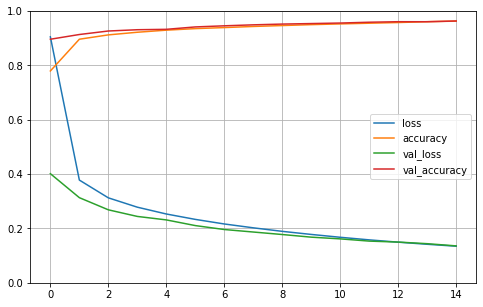

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [21]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile


Evaluate on test data
313/313 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9693
test loss, test acc: [0.09903569519519806, 0.9692999720573425]


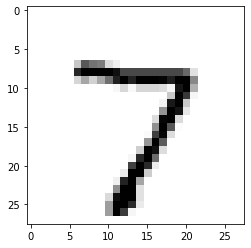

In [22]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [23]:
'''
Ojo aqui viene slicing xq presupone que le entran varios inputs
Nos da las probabilidades de pertenecer a una clase u otra.
'''


predictions shape: (1, 10)


array([[0.   , 0.   , 0.001, 0.007, 0.   , 0.   , 0.   , 0.991, 0.   ,
        0.   ]], dtype=float32)

In [24]:
predictions.max()

0.991

In [25]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [26]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [27]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [29]:
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation="relu",
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # una unica neurona de salida
])

model.compile(loss="mean_squared_error",
              optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.6018 - val_loss: 4.9579
Epoch 2/20
363/363 [==============================] - 0s 916us/step - loss: 0.7970 - val_loss: 0.4317
Epoch 3/20
363/363 [==============================] - 0s 933us/step - loss: 0.4177 - val_loss: 0.3949
Epoch 4/20
363/363 [==============================] - 0s 832us/step - loss: 0.4068 - val_loss: 0.3770
Epoch 5/20
363/363 [==============================] - 0s 869us/step - loss: 0.3717 - val_loss: 0.3702
Epoch 6/20
363/363 [==============================] - 0s 915us/step - loss: 0.3791 - val_loss: 0.3623
Epoch 7/20
363/363 [==============================] - 0s 938us/step - loss: 0.3803 - val_loss: 0.3687
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5269 - val_loss: 0.3590
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3706 - val_loss: 0.3525
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3538 - val_

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [30]:
model.save("my_keras_model.h5")

In [31]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Sirven para que el modelo se vaya guardando tras cada epoch, asi no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 676us/step - loss: 0.3415
Epoch 2/10
363/363 [==============================] - 0s 725us/step - loss: 0.3359
Epoch 3/10
363/363 [==============================] - 0s 811us/step - loss: 0.3341
Epoch 4/10
363/363 [==============================] - 0s 739us/step - loss: 0.3323
Epoch 5/10
363/363 [==============================] - 0s 807us/step - loss: 0.3311
Epoch 6/10
363/363 [==============================] - 0s 841us/step - loss: 0.3302
Epoch 7/10
363/363 [==============================] - 0s 745us/step - loss: 0.3301
Epoch 8/10
363/363 [==============================] - 0s 725us/step - loss: 0.3287
Epoch 9/10
363/363 [==============================] - 0s 801us/step - loss: 0.3285
Epoch 10/10
363/363 [==============================] - 0s 777us/step - loss: 0.3280
Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3262 - val_loss: 0.3306
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - l

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [33]:
# 10 esta bien. Lo pondemos a 5 para el ejercicio
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3069 - val_loss: 0.3168
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.3151
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3086 - val_loss: 0.3094
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3125 - val_loss: 0.3234
Epoch 5/100
363/363 [==============================] - 0s 995us/step - loss: 0.3043 - val_loss: 0.3211
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3047 - val_loss: 0.3295
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3042 - val_loss: 0.3216
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3194


### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [34]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [35]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3057 - val_loss: 0.3346
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3050 - val_loss: 0.3297
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3034 - val_loss: 0.3190
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3027 - val_loss: 0.3218
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3047 - val_loss: 0.3214
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3020 - val_loss: 0.3210
Epoch 7/50
363/363 [==============================] - 0s 969us/step - loss: 0.3005 - val_loss: 0.3172
Epoch 8/50
363/363 [==============================] - 0s 936us/step - loss: 0.3022 - val_loss: 0.3181
Epoch 9/50
363/363 [==============================] - 0s 905us/step - loss: 0.3114 - val_loss: 0.3178
Epoch 10/50
363/363 [==============================] - 0s 901us/step - loss: 0.2999 - val_loss

In [36]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''

'\nPara lanzarlo desde el jupyter notebook\n%load_ext tensorboard\n%tensorboard --logdir=./my_logs --port=6006\n\nPara lanzarlo desde el terminal, hay que estar en la carpeta de los logs\ntensorboard --logdir=./my_logs --port=6006\n\n'

In [37]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 22404), started 1 day, 15:40:48 ago. (Use '!kill 22404' to kill it.)